Persona_code
47    4082.0
10    1935.0
3     1574.0
35    1431.0
40    1298.0
18    1217.0
33    1152.0
5     1074.0
43     930.0
17     864.0
Name: M, dtype: float64
Persona_code
10    2622.0
43    1547.0
35    1058.0
33    1011.0
45     801.0
23     639.0
17     630.0
0      619.0
39     456.0
47     377.0
Name: F, dtype: float64


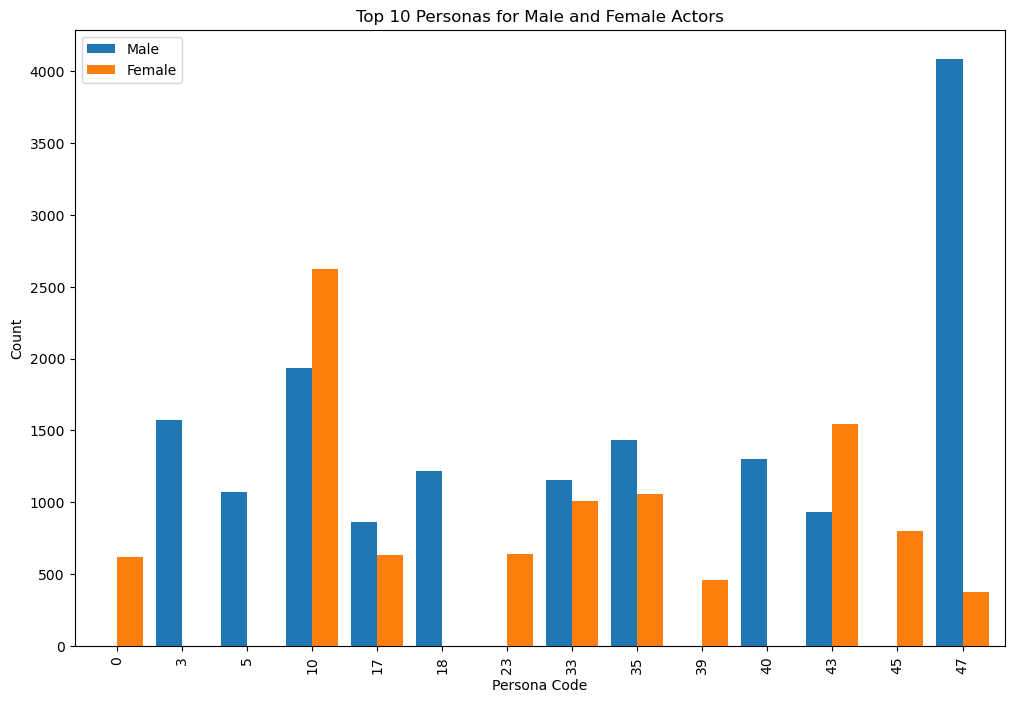

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
file_path = "../Data/Persona/movies_char_personas.csv"  # Replace with the actual path to your CSV file
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame to understand its structure
#print(df.head())

# Replace NaN values in "Actor Gender" column with a placeholder (e.g., 'Unknown')
df['Actor gender'].fillna('Unknown', inplace=True)

# Analyze the relationship between "Persona_code" and "Actor Gender"
persona_gender_counts = df.groupby(['Persona_code', 'Actor gender']).size().unstack()

# Display the top 10 personas for male and female actors
top_male_personas = persona_gender_counts['M'].nlargest(10)
top_female_personas = persona_gender_counts['F'].nlargest(10)

#print("Top 10 Personas for Male Actors:")
print(top_male_personas)

#print("\nTop 10 Personas for Female Actors:")
print(top_female_personas)


# Combine the top personas for both male and female actors
combined_top_personas = pd.concat([top_male_personas, top_female_personas], axis=1, keys=['Male', 'Female'])

# Visualize the results in a grouped bar plot
fig, ax = plt.subplots(figsize=(12, 8))

combined_top_personas.plot(kind='bar', ax=ax, width=0.8)

ax.set_title('Top 10 Personas for Male and Female Actors')
ax.set_ylabel('Count')
ax.set_xlabel('Persona Code')

plt.show()


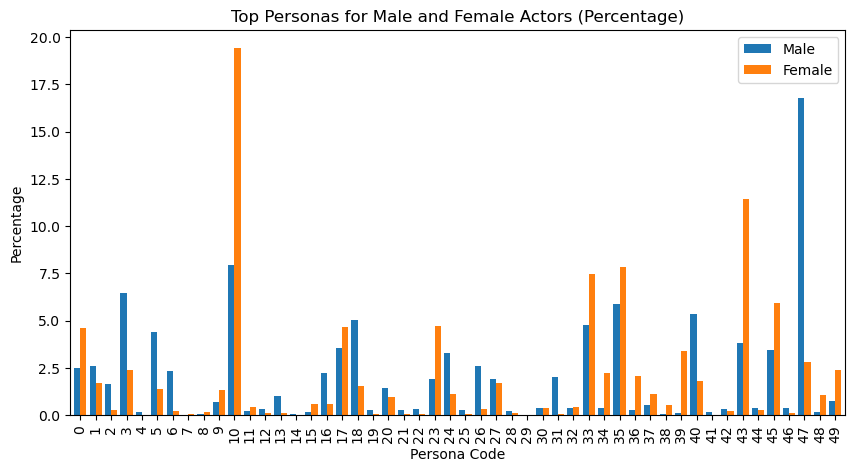

In [18]:
# Calculate the total number of male and female actors
total_male_actors = df[df['Actor gender'] == 'M'].shape[0]
total_female_actors = df[df['Actor gender'] == 'F'].shape[0]

# Analyze the relationship between "Persona_code" and "Actor Gender"
persona_gender_counts = df.groupby(['Persona_code', 'Actor gender']).size().unstack()

# Calculate the percentages for each persona separately
persona_gender_percentages_male = persona_gender_counts['M'] / total_male_actors * 100
persona_gender_percentages_female = persona_gender_counts['F'] / total_female_actors * 100

# Combine the percentages for both male and female actors
combined_percentages = pd.concat([persona_gender_percentages_male, persona_gender_percentages_female], axis=1, keys=['Male', 'Female'])

# Visualize the results in a grouped bar plot
fig, ax = plt.subplots(figsize=(10, 5))

combined_percentages.plot(kind='bar', ax=ax, width=0.8)

ax.set_title('Top Personas for Male and Female Actors (Percentage)')
ax.set_ylabel('Percentage')
ax.set_xlabel('Persona Code')

plt.show()

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file with characters' personas
characters_file_path = "../Data/Persona/movies_char_personas.csv" 
characters_df = pd.read_csv(characters_file_path)
sample_ch_df = characters_df.head(10000)

# Load the TSV file with movie metadata and provide column names
metadata_file_path = "../Data/movie.metadata.tsv"
metadata_columns = ['Wikipedia Movie ID', 'Freebase Movie ID', 'Movie name', 'Movie Release Data', 'Movie Box Office Revenue', 'Movie runtime', 'Movie languages', 'Movie countries','Movie_Genre']
metadata_df = pd.read_csv(metadata_file_path, sep='\t', header=None, names=metadata_columns)
sample_meta_df = metadata_df.head(10000)

#display(metadata_df)

# Merge dataframes based on "Freebase Movie ID"
merged_df = pd.merge(sample_ch_df, sample_meta_df, on="Freebase Movie ID", how="inner")

# Replace NaN values in "Actor Gender" column with a placeholder (e.g., 'Unknown')
merged_df['Actor gender'].fillna('Unknown', inplace=True)

# Split the genres in the "Movie Genre" column
merged_df['Movie_Genre'] = merged_df['Movie_Genre'].str.split(',')

# Create a new dataframe with one row for each genre of each movie
expanded_genre_df = merged_df.explode('Movie_Genre')

display(expanded_genre_df)

# Identify the top 25 genres
top_genres = expanded_genre_df['Movie_Genre'].value_counts().nlargest(25).index

# Iterate through each genre and show the top 10 personas
for genre in top_genres:
    genre_df = expanded_genre_df[expanded_genre_df['Movie_Genre'] == genre]
    persona_counts = genre_df['Persona_code'].value_counts().nlargest(10)
    
    print(f"\nTop 10 Personas for {genre}:")
    print(persona_counts)

,Freebase_char_map,Movie Name,Persona_code,Wikipedia Movie ID_x,Freebase Movie ID,Movie release date,Character Name,Actor DOB,Actor gender,Actor height,...,Freebase_character_id,Freebase_actor_id,Wikipedia Movie ID_y,Movie name,Movie Release Data,Movie Box Office Revenue,Movie runtime,Movie languages,Movie countries,Movie_Genre
0,/m/02vc1w6,Body of Lies,47,10061978,/m/02q0k7v,2008-10-05,Roger Ferris,1974-11-11,M,1.830,...,/m/04gds05,/m/0dvmd,10061978,Body of Lies,2008-10-05,115097286.0,128.0,"{""/m/0jzc"": ""Arabic Language"", ""/m/02h40lc"": ""...","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"""
0,/m/02vc1w6,Body of Lies,47,10061978,/m/02q0k7v,2008-10-05,Roger Ferris,1974-11-11,M,1.830,...,/m/04gds05,/m/0dvmd,10061978,Body of Lies,2008-10-05,115097286.0,128.0,"{""/m/0jzc"": ""Arabic Language"", ""/m/02h40lc"": ""...","{""/m/09c7w0"": ""United States of America""}","""/m/060__y"": ""Film adaptation"""
0,/m/02vc1w6,Body of Lies,47,10061978,/m/02q0k7v,2008-10-05,Roger Ferris,1974-11-11,M,1.830,...,/m/04gds05,/m/0dvmd,10061978,Body of Lies,2008-10-05,115097286.0,128.0,"{""/m/0jzc"": ""Arabic Language"", ""/m/02h40lc"": ""...","{""/m/09c7w0"": ""United States of America""}","""/m/07s9rl0"": ""Drama"""
0,/m/02vc1w6,Body of Lies,47,10061978,/m/02q0k7v,2008-10-05,Roger Ferris,1974-11-11,M,1.830,...,/m/04gds05,/m/0dvmd,10061978,Body of Lies,2008-10-05,115097286.0,128.0,"{""/m/0jzc"": ""Arabic Language"", ""/m/02h40lc"": ""...","{""/m/09c7w0"": ""United States of America""}","""/m/0c3351"": ""Suspense"""
0,/m/02vc1w6,Body of Lies,47,10061978,/m/02q0k7v,2008-10-05,Roger Ferris,1974-11-11,M,1.830,...,/m/04gds05,/m/0dvmd,10061978,Body of Lies,2008-10-05,115097286.0,128.0,"{""/m/0jzc"": ""Arabic Language"", ""/m/02h40lc"": ""...","{""/m/09c7w0"": ""United States of America""}","""/m/082gq"": ""War film"""
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1145,/m/04hvc11,The Miracle Maker,33,1869084,/m/062h27,2000,Mary Magdalene,1958-03-03,F,1.650,...,/m/042gzw5,/m/0525b,1869084,The Miracle Maker,2000,NaN,90.0,"{""/m/02h40lc"": ""English Language""}","{""/m/06bnz"": ""Russia"", ""/m/07ssc"": ""United Kin...","""/m/04xvh5"": ""Costume drama""}"
1146,/m/0dlrdz7,The Miracle Maker,31,1869084,/m/062h27,2000,Simon the Pharisee,1953-05-24,M,1.890,...,/m/0h2vzwr,/m/02wgln,1869084,The Miracle Maker,2000,NaN,90.0,"{""/m/02h40lc"": ""English Language""}","{""/m/06bnz"": ""Russia"", ""/m/07ssc"": ""United Kin...","{""/m/06qln"": ""Stop motion"""
1146,/m/0dlrdz7,The Miracle Maker,31,1869084,/m/062h27,2000,Simon the Pharisee,1953-05-24,M,1.890,...,/m/0h2vzwr,/m/02wgln,1869084,The Miracle Maker,2000,NaN,90.0,"{""/m/02h40lc"": ""English Language""}","{""/m/06bnz"": ""Russia"", ""/m/07ssc"": ""United Kin...","""/m/04xvh5"": ""Costume drama""}"
1147,/m/0dlrgfl,The Miracle Maker,35,1869084,/m/062h27,2000,Mary of Nazareth,1971-12-01,F,1.727,...,/m/0h25_p3,/m/03k545,1869084,The Miracle Maker,2000,NaN,90.0,"{""/m/02h40lc"": ""English Language""}","{""/m/06bnz"": ""Russia"", ""/m/07ssc"": ""United Kin...","{""/m/06qln"": ""Stop motion"""



Top 10 Personas for  "/m/07s9rl0": "Drama":
10    59
35    53
47    46
43    35
3     27
24    21
23    21
5     18
45    11
26    10
Name: Persona_code, dtype: int64

Top 10 Personas for  "/m/01z4y": "Comedy":
10    42
3     37
33    22
47    17
35    12
17    11
40     9
45     7
16     6
22     6
Name: Persona_code, dtype: int64

Top 10 Personas for {"/m/01jfsb": "Thriller":
47    36
0     24
23    24
17    23
40    19
5     12
1     10
33     9
27     7
6      6
Name: Persona_code, dtype: int64

Top 10 Personas for  "/m/02l7c8": "Romance Film":
10    42
43    20
47    12
35    10
33     7
45     5
3      4
18     3
20     3
23     3
Name: Persona_code, dtype: int64

Top 10 Personas for  "/m/01z4y": "Comedy"}:
10    43
3     15
43    15
47    11
16     8
35     7
33     7
2      4
40     3
0      2
Name: Persona_code, dtype: int64

Top 10 Personas for  "/m/02kdv5l": "Action":
47    40
5     23
33     8
24     7
6      5
40     5
27     5
3      4
13     3
23     3
Name: Persona_cod

In [53]:
# Iterate through each persona and show the top 5 genres
persona_list = merged_df['Persona_code'].unique()

for persona in persona_list:
    persona_df = merged_df[merged_df['Persona_code'] == persona]
    genre_counts = persona_df['Movie_Genre'].explode().value_counts().nlargest(5)
    
    print(f"\nTop 5 Genres for Persona {persona}:")
    print(genre_counts)


Top 5 Genres for Persona 47:
 "/m/07s9rl0": "Drama"          46
 "/m/02kdv5l": "Action"         40
{"/m/01jfsb": "Thriller"        36
{"/m/0lsxr": "Crime Fiction"    25
 "/m/01z4y": "Comedy"           17
Name: Movie_Genre, dtype: int64

Top 5 Genres for Persona 34:
 "/m/07s9rl0": "Drama"           3
 "/m/082gq": "War film"          2
{"/m/01jfsb": "Thriller"         2
{"/m/0lsxr": "Crime Fiction"     2
 "/m/02h8pkk": "Family Drama"    1
Name: Movie_Genre, dtype: int64

Top 5 Genres for Persona 5:
 "/m/02kdv5l": "Action"              23
 "/m/03btsm8": "Action/Adventure"    19
 "/m/03k9fj": "Adventure"            18
 "/m/07s9rl0": "Drama"               18
 "/m/06l3bl": "Epic"                 12
Name: Movie_Genre, dtype: int64

Top 5 Genres for Persona 33:
 "/m/0hqxf": "Family Film"    24
 "/m/01hmnh": "Fantasy"       24
 "/m/01z4y": "Comedy"         22
{"/m/03k9fj": "Adventure"     18
 "/m/0hcr": "Animation"       17
Name: Movie_Genre, dtype: int64

Top 5 Genres for Persona 24:
 "/m/07s

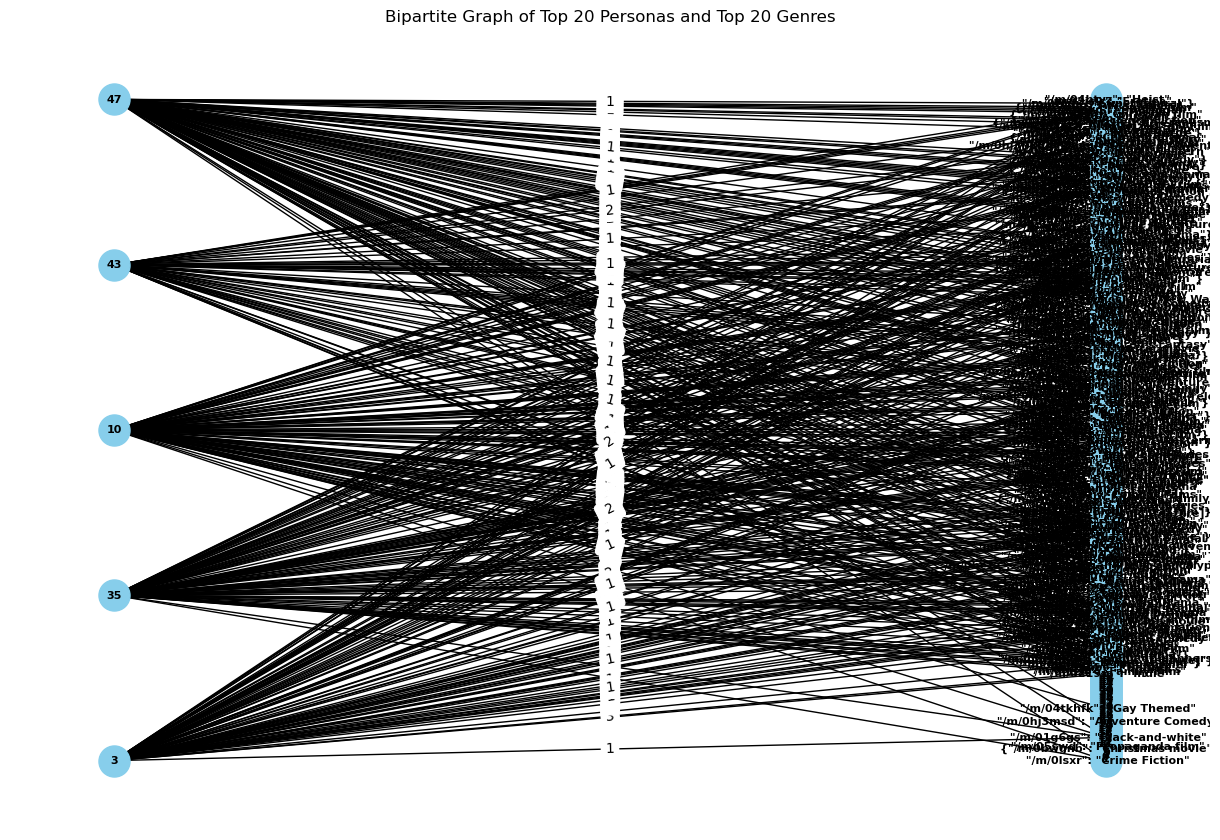

In [4]:
import networkx as nx

# Identify the top 20 personas and genres
top_personas = merged_df['Persona_code'].value_counts().nlargest(5).index
top_genres = expanded_genre_df['Movie_Genre'].value_counts().nlargest(5).index

# Filter dataframes to include only the top 20 personas and genres
filtered_persona_df = merged_df[merged_df['Persona_code'].isin(top_personas)]
filtered_genre_df = expanded_genre_df[expanded_genre_df['Movie_Genre'].isin(top_genres)]

# Create a bipartite graph
B = nx.Graph()

# Add nodes for top 20 personas and top 20 genres
B.add_nodes_from(top_personas, bipartite=0, label='Persona')
B.add_nodes_from(top_genres, bipartite=1, label='Genre')

# Iterate through movies to create edges and calculate counts
for movie_id, group in merged_df.groupby('Freebase Movie ID'):
    personas = group['Persona_code'].unique()
    genres = group['Movie_Genre'].explode().unique()

    for persona in personas:
        for genre in genres:
            if B.has_edge(persona, genre):
                # If edge already exists, increment the count
                B[persona][genre]['weight'] += 1
            else:
                # If edge does not exist, add a new edge with count 1
                B.add_edge(persona, genre, weight=1)

# Draw the bipartite graph with automatic layout
plt.figure(figsize=(12, 8))
pos = nx.bipartite_layout(B, top_personas)
nx.draw(B, pos, with_labels=True, font_size=8, node_size=500, node_color='skyblue', font_color='black', font_weight='bold')
edge_labels = nx.get_edge_attributes(B, 'weight')
nx.draw_networkx_edge_labels(B, pos, edge_labels=edge_labels)
plt.title('Bipartite Graph of Top 20 Personas and Top 20 Genres')
plt.show()